# Exercises

Create a new notebook, knn_model, and work with the titanic dataset to answer the following:

    Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

    Evaluate your results using the model score, confusion matrix, and classification report.

    Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

    Run through steps 1-3 setting k to 10

    Run through steps 1-3 setting k to 20

    What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

    Which model performs best on our out-of-sample data from validate?


In [2]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier

import acquire as acq
import prepare as prep
import my_model as m

np.random.seed(42)

# knn with titanic

In [40]:
df = acq.get_titanic_data()
df = prep.prep_titanic(df)

csv file found and read


In [41]:
# making a function to remove non-encoded columns. this is now in prepare
def prep_titanic_for_model(df):
    """
    - take in titanic dataframe from prep_titanic function
    - remove non-encoded columns
    - return df with only numeric columns ready for modeling
    """
    drop_cols = ['sex', 'embarked']
    df = df.drop(columns=drop_cols)
    return df

In [42]:
df = prep_titanic_for_model(df)

In [43]:
df.head()

,survived,pclass,sibsp,parch,fare,alone,sex_male,embarked_Q,embarked_S
0,0,3,1,0,7.2500,0,1,0,1
1,1,1,1,0,71.2833,0,0,0,0
2,1,3,0,0,7.9250,1,0,0,1
3,1,1,1,0,53.1000,0,0,0,1
4,0,3,0,0,8.0500,1,1,0,1


In [9]:
target = 'survived'
train, validate, test = prep.split_function(df, target)

Prepared df: (891, 9)

Train: (534, 9)
Validate: (178, 9)
Test: (179, 9)


In [11]:
X_train, X_validate, X_test, y_train, y_validate, y_test, baseline_accuracy = (
    m.get_X_y_baseline(train, validate, test, target)
    )

In [12]:
baseline_accuracy

0.6161048689138576

In [13]:
# Everything above was acquiring, preparing, and getting the dataframe ready for modeling

In [56]:
# I'm going to make a loop and get a bunch of knn models and look at scores

results = []
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i, weights='uniform')
    knn.fit(X_train, y_train)
    train_acc = knn.score(X_train, y_train)
    val_acc = knn.score(X_validate, y_validate)
    results.append([train_acc, val_acc])
    
results_df = pd.DataFrame(results, index=(range(1,21)), columns=['train_acc', 'val_acc'])

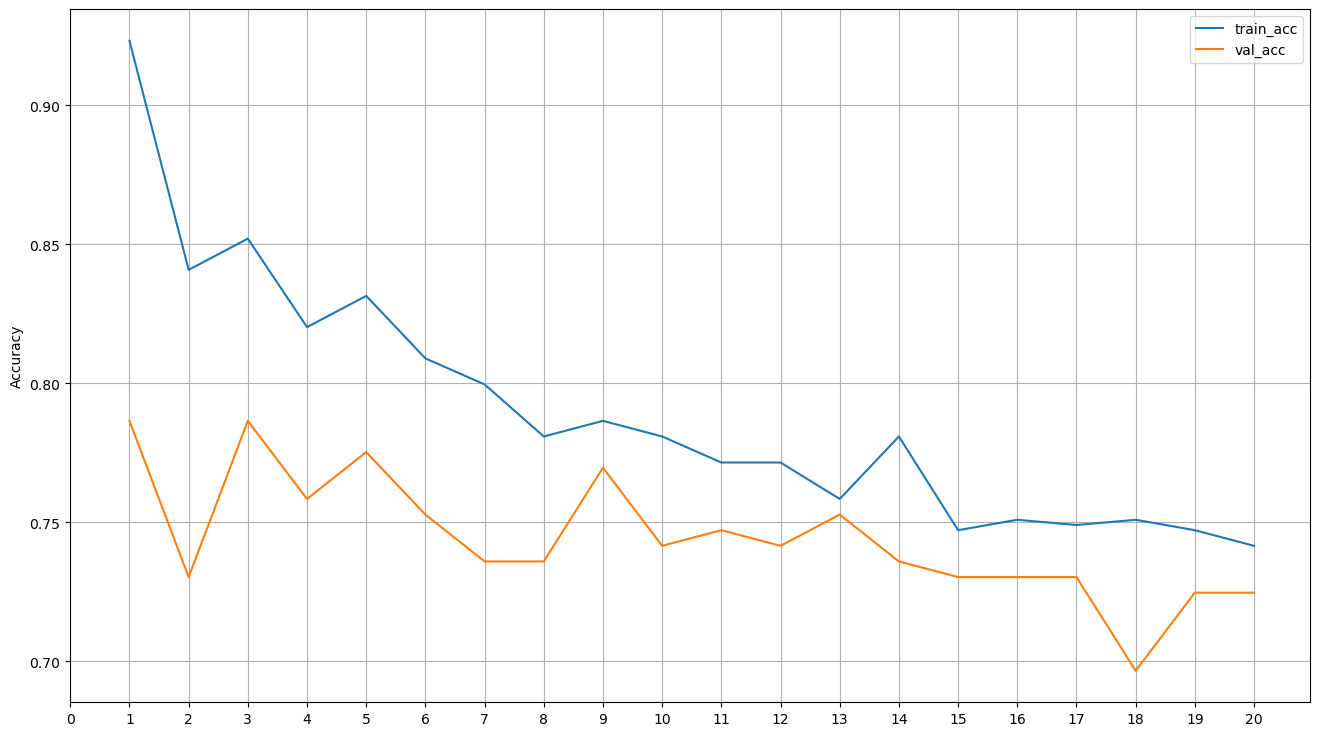

In [58]:
# plot the data
results_df[['train_acc','val_acc']].plot(figsize = (16,9))
# results_df.plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,21,1))
plt.grid()

In [59]:
# Best n_neigbors value is 9 (relatively high accuracy with relatively low overfit)
results_df.loc[5:10]

,train_acc,val_acc
5,0.831461,0.775281
6,0.808989,0.752809
7,0.799625,0.735955
8,0.780899,0.735955
9,0.786517,0.769663
10,0.780899,0.741573


In [60]:
# view the metrics from n_neighbors = 9
knn = KNeighborsClassifier(n_neighbors=9, weights='uniform')
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [61]:
y_pred = knn.predict(X_train)
m.get_tree_metrics(y_train, y_pred)

CONFUSION MATRIX
          0_predicted  1_predicted
0_actual          280           49
1_actual           65          140

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       329
           1       0.74      0.68      0.71       205

    accuracy                           0.79       534
   macro avg       0.78      0.77      0.77       534
weighted avg       0.78      0.79      0.78       534

Accuracy: 0.7865168539325843

True Positive Rate/Sensitivity/Recall/Power: 0.6829268292682927
False Positive Rate/False Alarm Ratio/Fall-out: 0.14893617021276595
True Negative Rate/Specificity/Selectivity: 0.851063829787234
False Negative Rate/Miss Rate: 0.3170731707317073

Precision/PPV: 0.7407407407407407
F1 Score: 0.7106598984771575

Support (0): 205
Support (1): 329


(280, 49, 65, 140)

In [62]:
# I'm going to redo the loop with weights='distance' and look at scores

results = []
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i, weights='distance')
    knn.fit(X_train, y_train)
    train_acc = knn.score(X_train, y_train)
    val_acc = knn.score(X_validate, y_validate)
    results.append([train_acc, val_acc])
    
results_df = pd.DataFrame(results, index=(range(1,21)), columns=['train_acc', 'val_acc'])

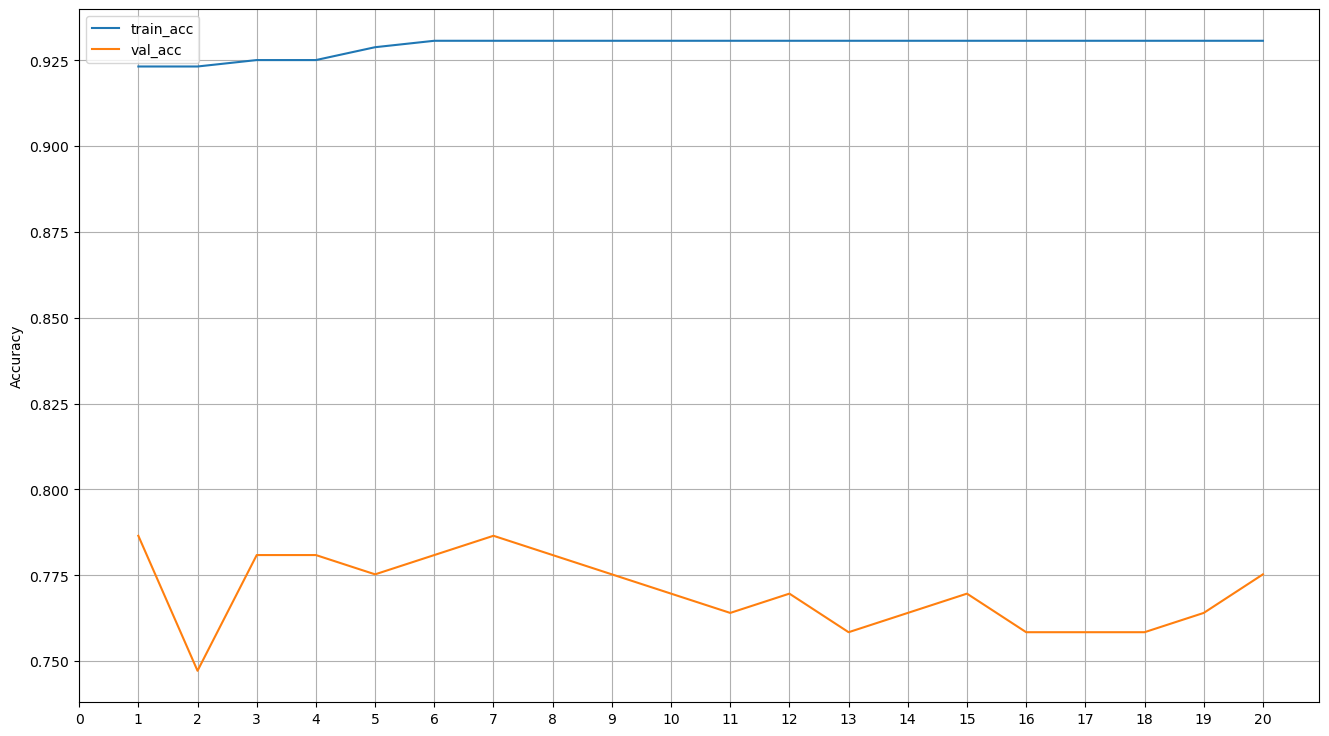

In [64]:
# plot the data
results_df[['train_acc','val_acc']].plot(figsize = (16,9))
# results_df.plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,21,1))
plt.grid()

## looks like n_neighbors = 7 is best for titanic

In [67]:
# looks like n_neighbors = 7 is best
# view the metrics from n_neighbors = 7
knn = KNeighborsClassifier(n_neighbors=7, weights='distance')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_train)
m.get_tree_metrics(y_train, y_pred)

CONFUSION MATRIX
          0_predicted  1_predicted
0_actual          322            7
1_actual           30          175

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95       329
           1       0.96      0.85      0.90       205

    accuracy                           0.93       534
   macro avg       0.94      0.92      0.93       534
weighted avg       0.93      0.93      0.93       534

Accuracy: 0.9307116104868914

True Positive Rate/Sensitivity/Recall/Power: 0.8536585365853658
False Positive Rate/False Alarm Ratio/Fall-out: 0.02127659574468085
True Negative Rate/Specificity/Selectivity: 0.9787234042553191
False Negative Rate/Miss Rate: 0.14634146341463414

Precision/PPV: 0.9615384615384616
F1 Score: 0.9043927648578812

Support (0): 205
Support (1): 329


(322, 7, 30, 175)

In [66]:
results_df.loc[5:10]

,train_acc,val_acc
5,0.928839,0.775281
6,0.930712,0.780899
7,0.930712,0.786517
8,0.930712,0.780899
9,0.930712,0.775281
10,0.930712,0.769663


## Sooo, 
### 1. knn with n_neighbors=9, weights='uniform' yields a train_acc: .79 and val_acc .77
### 2. knn with n_neighbors=7, weights='distance' yields a train_acc: .93 and val_acc .79

### Also, all of the knn models with distance had a higher percentage and bigger drop. Which should we pick? I think number 1 because the difference between train and val is lower, but I'm not sure.

# knn with telco

In [3]:
# acqure and prepare functions from before
df = acq.get_telco_data()
df = prep.prep_telco(df)

# extra step I added to make an "encoded" dataframe with only numeric columns that are useful
e_df = prep.prep_telco_for_model(df)

csv file found and read


In [7]:
# set our target variable and split the data
target = 'churn_encoded'
train, validate, test = prep.split_function(e_df, target)

Prepared df: (7043, 24)

Train: (4225, 24)
Validate: (1409, 24)
Test: (1409, 24)


In [8]:
# get the encoded df split up for modeling
X_train, X_validate, X_test, y_train, y_validate, y_test, baseline_accuracy = (
    m.get_X_y_baseline(train, validate, test, target)
    )

In [9]:
baseline_accuracy

0.7346745562130178

In [22]:
# new function which is now in my_model.py
def get_knn_metrics(X_train, X_validate, y_train, y_validate, weights_='uniform', max_n=20):
    """
    This function will
    - take in X_train, X_validate, y_train, y_validate, weights_, max_n
      -- weights_: default 'uniform', only other option is 'distance'
      -- max_n: default 20 - max number of neighbors to try
    - get train_accuracy and validate_accuracy for n_neighbors = 1-20
    - return dataframe with results where the index == n_neighbors (1-20)
    """
    results = []
    for i in range(1,max_n+1):
        knn = KNeighborsClassifier(n_neighbors=i, weights=weights_)
        knn.fit(X_train, y_train)
        train_acc = knn.score(X_train, y_train)
        val_acc = knn.score(X_validate, y_validate)
        results.append([train_acc, val_acc])

    results_df = pd.DataFrame(results, index=(range(1,max_n+1)), columns=['train_acc', 'val_acc'])
    return results_df

In [23]:
results_df = get_knn_metrics(X_train, X_validate, y_train, y_validate, max_n=30)

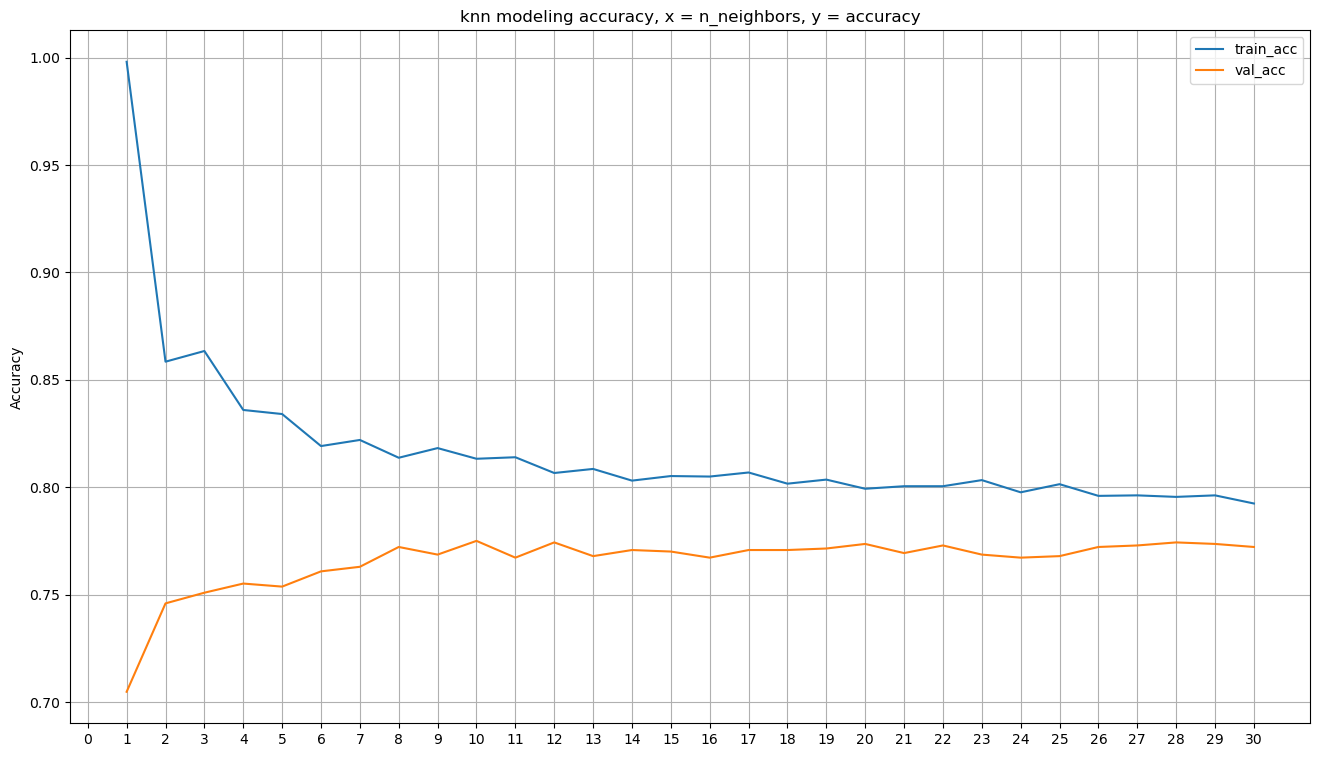

In [35]:
# plot the results
results_df[['train_acc','val_acc']].plot(figsize = (16,9))
# results_df.plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,31,1))
plt.title('knn modeling accuracy, x = n_neighbors, y = accuracy')
plt.grid()

In [26]:
results_df.head()

,train_acc,val_acc
1,0.998107,0.704755
2,0.858462,0.745919
3,0.863432,0.750887
4,0.835976,0.755145
5,0.834083,0.753726


In [31]:
results_df['difference'] = results_df.train_acc - results_df.val_acc
results_df.sort_values('val_acc', ascending=False).head(10)

,train_acc,val_acc,difference
10,0.813254,0.775018,0.038237
28,0.795503,0.774308,0.021195
12,0.806627,0.774308,0.032319
29,0.796213,0.773598,0.022615
20,0.799290,0.773598,0.025692
27,0.796213,0.772889,0.023324
22,0.800473,0.772889,0.027585
30,0.792426,0.772179,0.020247
26,0.795976,0.772179,0.023797
8,0.813728,0.772179,0.041549


In [37]:
results_df = get_knn_metrics(X_train, X_validate, y_train, y_validate, weights_='distance')

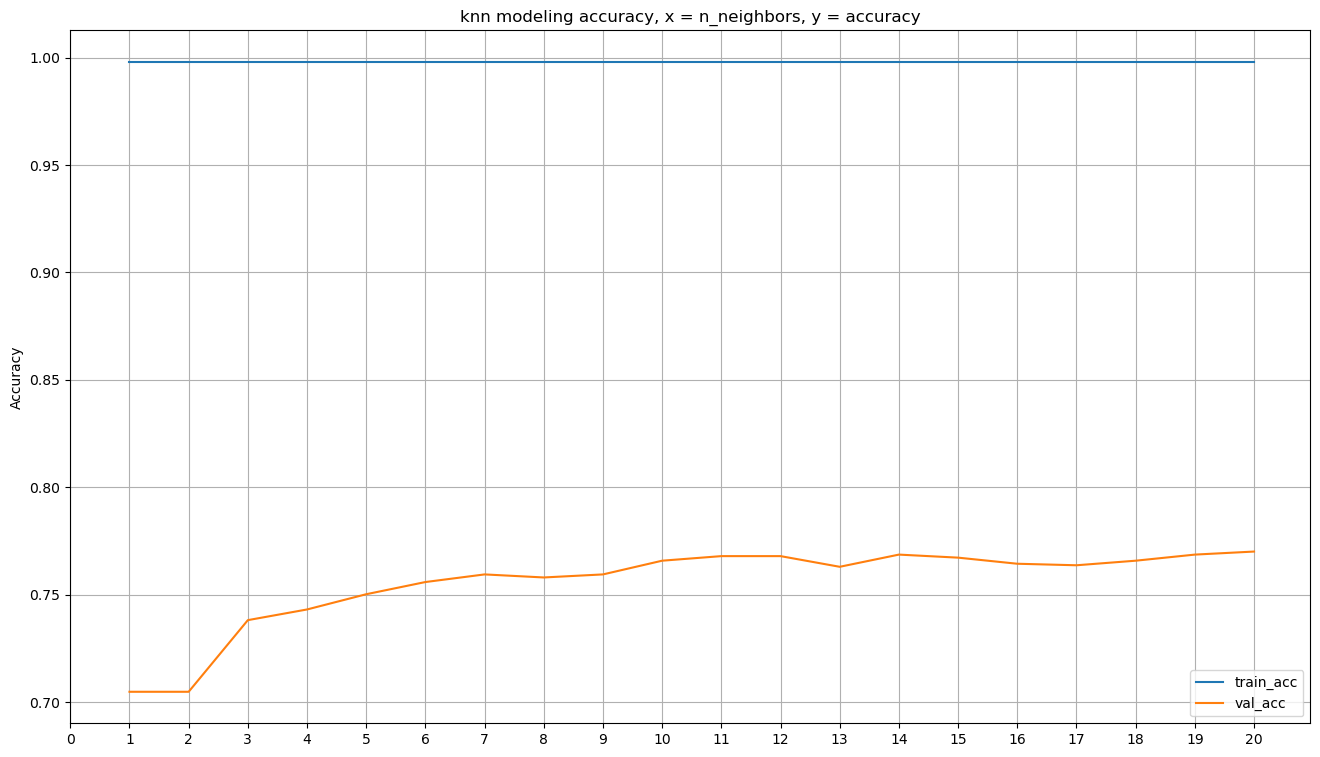

In [38]:
# plot the data
results_df[['train_acc','val_acc']].plot(figsize = (16,9))
# results_df.plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,21,1))
plt.title('knn modeling accuracy, x = n_neighbors, y = accuracy')
plt.grid()

## Sooo, for telco dataset
### 1. with weights= 'uniform', setting n_neighbors to 28 yeilds train_acc of .7955 and val_acc of .7743
### 2. with weights= 'distance', I'm skeptical. train_acc is always 1.0 and val_acc gets up to ~.77

### I choose #1.  And it does beat the baseline which was .735

In [33]:
knn = KNeighborsClassifier(n_neighbors=28, weights='uniform')
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=28)

In [34]:
y_pred = knn.predict(X_train)
m.get_tree_metrics(y_train, y_pred)

CONFUSION MATRIX
          0_predicted  1_predicted
0_actual         2945          159
1_actual          705          416

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.95      0.87      3104
           1       0.72      0.37      0.49      1121

    accuracy                           0.80      4225
   macro avg       0.77      0.66      0.68      4225
weighted avg       0.78      0.80      0.77      4225

Accuracy: 0.7955029585798816

True Positive Rate/Sensitivity/Recall/Power: 0.3710972346119536
False Positive Rate/False Alarm Ratio/Fall-out: 0.05122422680412371
True Negative Rate/Specificity/Selectivity: 0.9487757731958762
False Negative Rate/Miss Rate: 0.6289027653880463

Precision/PPV: 0.7234782608695652
F1 Score: 0.4905660377358491

Support (0): 1121
Support (1): 3104


(2945, 159, 705, 416)